## Aluno: Fernando Gomes Papi

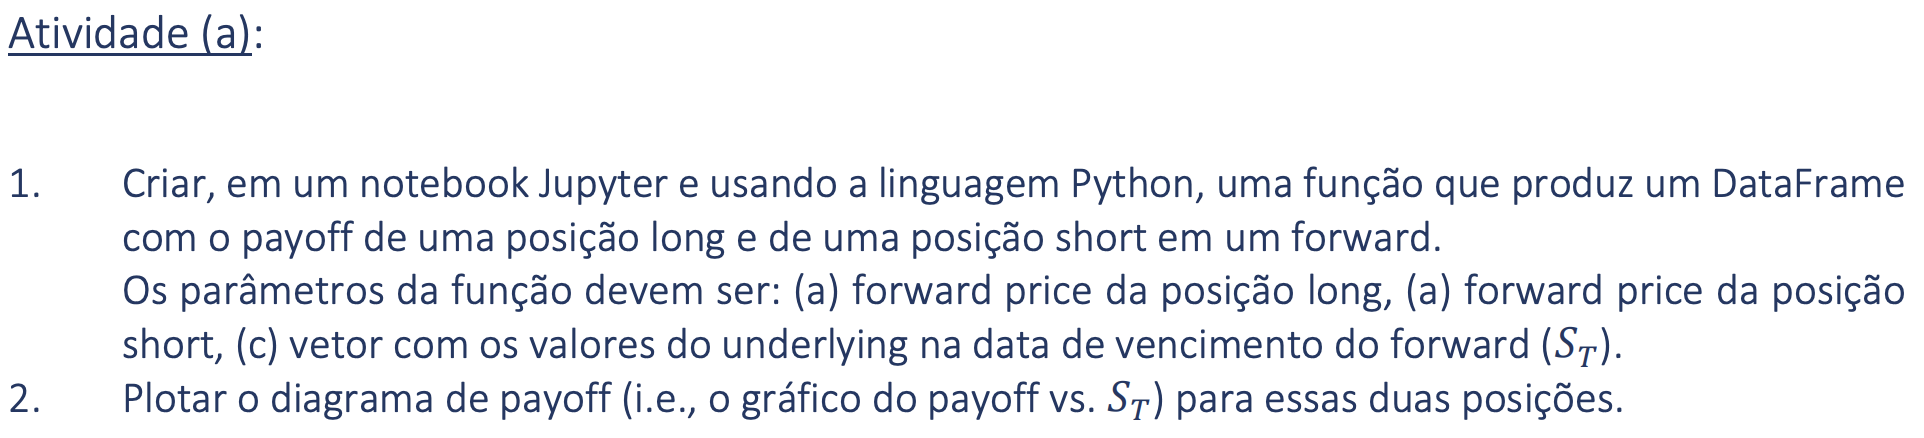

In [2]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def forward_payoff(forward_price_long, forward_price_short, st):

    payoff_long_forward = st - forward_price_long
    payoff_short_forward =  forward_price_short - st

    return payoff_long_forward, payoff_short_forward

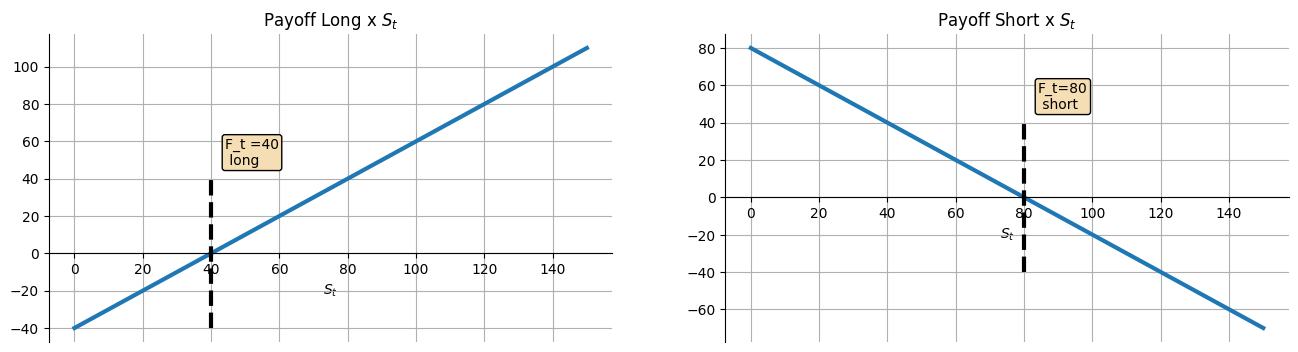

In [61]:
st = np.linspace(0, 150)
t = np.linspace(0,120)
T = 80 
Ft_long = 40 # Forward Price Long
Ft_short = 80 # Forward Price Long


payoff_long_forward, payoff_short_forward = forward_payoff(Ft_long, Ft_short, st)


fig, axs = plt.subplots(1, 2, figsize=(16,4))
ax, ax1 = axs
ax.set_title('Payoff Long x $S_t$')
ax.plot(st, payoff_long_forward, lw=3)
ax.plot([Ft_long, Ft_long], [-40, 40], 'k--', lw=3)
ax.annotate(f'F_t ={Ft_long}\n long', (Ft_long, 40),
            textcoords="offset points",
            xytext=(10,10), ha='left',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))

ax.set_xlabel("$S_t$")

ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1.set_title('Payoff Short x $S_t$')
ax1.plot(st, payoff_short_forward, lw=3)
ax1.plot([Ft_short, Ft_short], [-40, 40], 'k--', lw=3)
ax1.annotate(f'F_t={Ft_short}\n short', (Ft_short, 40),
            textcoords="offset points",
            xytext=(10,10), ha='left',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
ax1.set_xlabel("$S_t$")

ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax.grid()
ax1.grid()
plt.show()





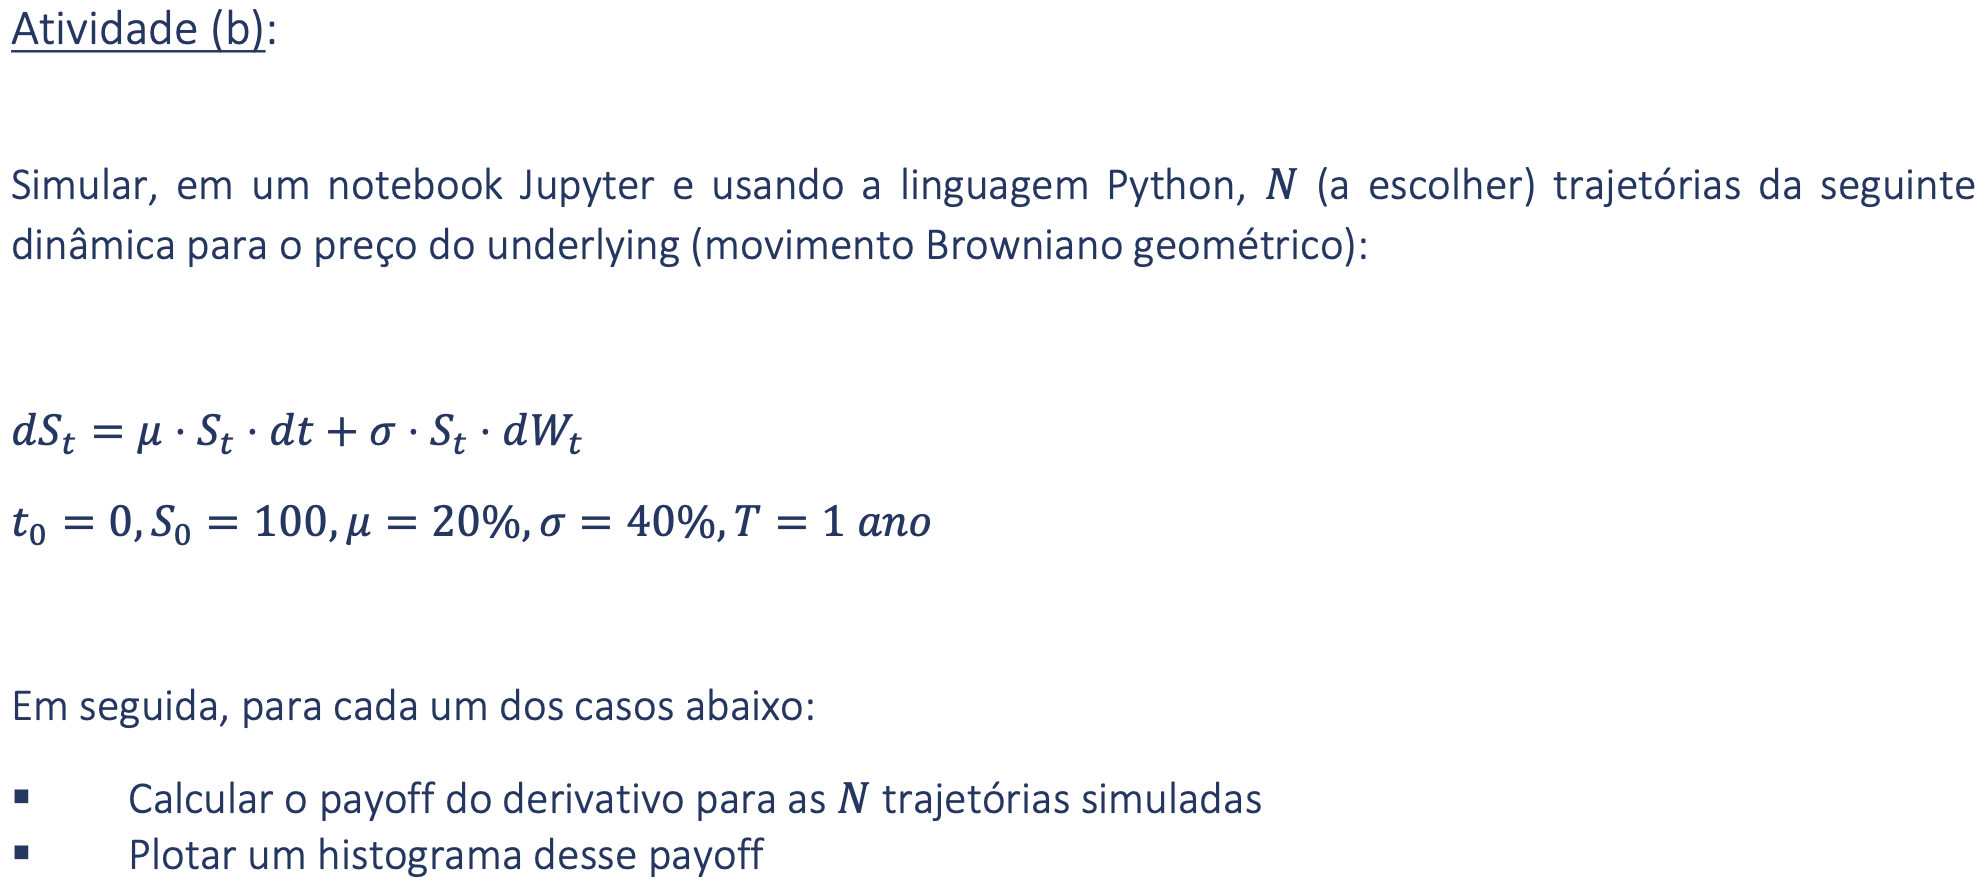

In [65]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [66]:
from aleatory.processes import GBM

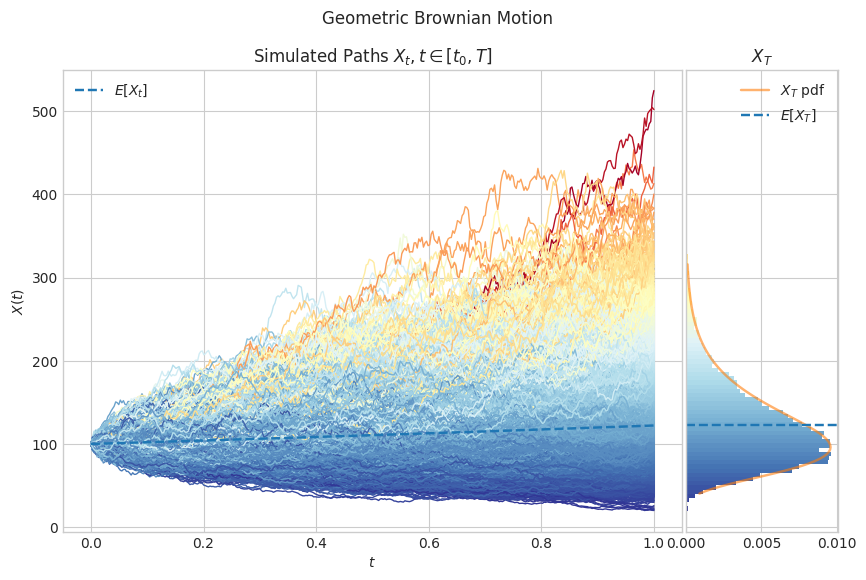

In [67]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)

fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=10000 ,**fig_kw)

In [68]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.029962,104.039601,101.032741,101.231257,100.494557,100.998363,99.322315,100.025601,96.621283,97.430475,...,100.346664,102.507782,97.682060,101.635597,101.155960,101.953506,97.929173,101.316304,96.164621,100.886147
2,101.447280,103.990770,96.725428,100.659542,102.243929,100.034940,100.035014,104.105175,96.642446,98.027336,...,97.634587,100.206487,99.084649,104.954219,101.332588,102.422796,101.007656,101.408689,93.368921,101.791252
3,100.717013,103.845870,96.330918,100.568880,103.128033,97.498456,97.869200,106.865448,100.574295,100.296983,...,96.079550,101.107672,97.675063,107.101072,102.386026,101.799734,100.765442,99.693839,91.726516,100.763260
4,101.475783,103.692435,95.771913,100.569552,101.026757,96.502538,95.427811,105.423000,102.238686,101.978499,...,95.999608,103.145532,94.138984,106.811139,98.866619,104.079992,97.584939,99.391182,91.605832,98.046106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,120.438471,110.008241,133.495157,103.569560,87.124317,55.450339,136.689881,73.241095,119.400267,84.800850,...,191.769263,93.615607,91.617684,116.071246,122.509904,189.987534,88.586402,137.929729,166.472304,90.865070
361,121.476480,107.373304,131.812790,103.270678,85.084592,57.975831,135.276942,72.036441,116.732653,84.314402,...,189.424266,96.021190,93.397180,114.094630,123.902465,188.985709,89.692582,140.729692,167.184661,94.289426
362,122.172615,109.116388,139.821633,102.098212,83.766928,58.388961,136.899746,71.587701,113.722551,86.149401,...,199.402350,97.465902,94.054695,112.248226,125.925862,193.158665,92.292334,135.410522,169.358105,94.354931
363,120.111832,109.035342,139.505311,101.701576,82.972965,59.814618,135.717449,70.722725,115.473121,84.984028,...,202.556643,96.649984,92.372223,113.577696,125.712667,195.602966,93.218111,135.715852,174.288076,93.943533


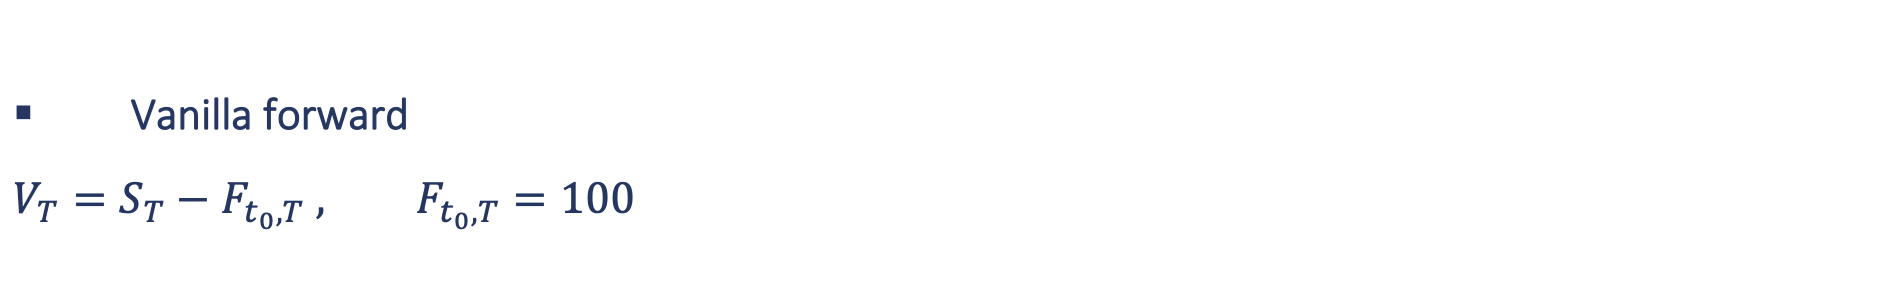

In [124]:
def plot_histogram(payoffs, title):
    # Set the style for the plot (optional)
    plt.figure(figsize=(8,8))
    sns.set(style="whitegrid")
    
    # Create a beautiful histogram
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    max_h = max(np.histogram(payoffs, bins=50)[0])
    plt.plot([np.mean(payoffs),np.mean(payoffs)], [0, max_h], c='orangered', ls='--', lw=3, zorder=4)
    plt.annotate(f'E(x)={np.mean(payoffs ):.2f}\n', (np.mean(payoffs), max_h),
            textcoords="offset points",
            xytext=(10,0), ha='left', va='top',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
    # Add labels and a title (customize as needed)
    plt.xlabel("Payoff")
    plt.ylabel("Payoff Count")
    plt.title(title)
    
    # Show the plot
    plt.show()

In [132]:
F_t = 100 # forward price

def payoff_forward_vanilla(final_price, forward_price):
    return final_price - forward_price

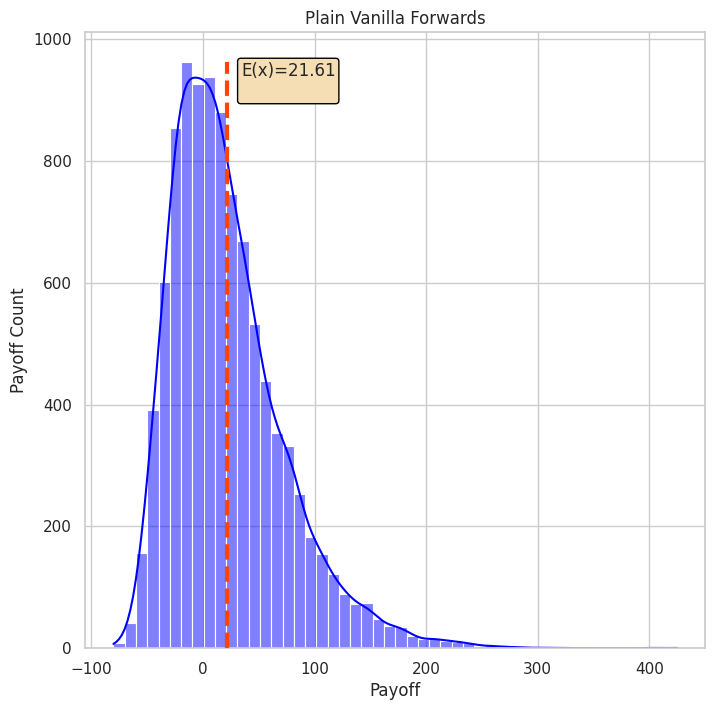

In [133]:
# final value of each price path
final_values = gbm_paths_df.iloc[-1]

# calculate all payoffs for vanilla call options
payoffs_vanilla = final_values.apply(lambda x: payoff_forward_vanilla(x, F_t))
# plot histogram
plot_histogram(payoffs_vanilla, 'Plain Vanilla Forwards')

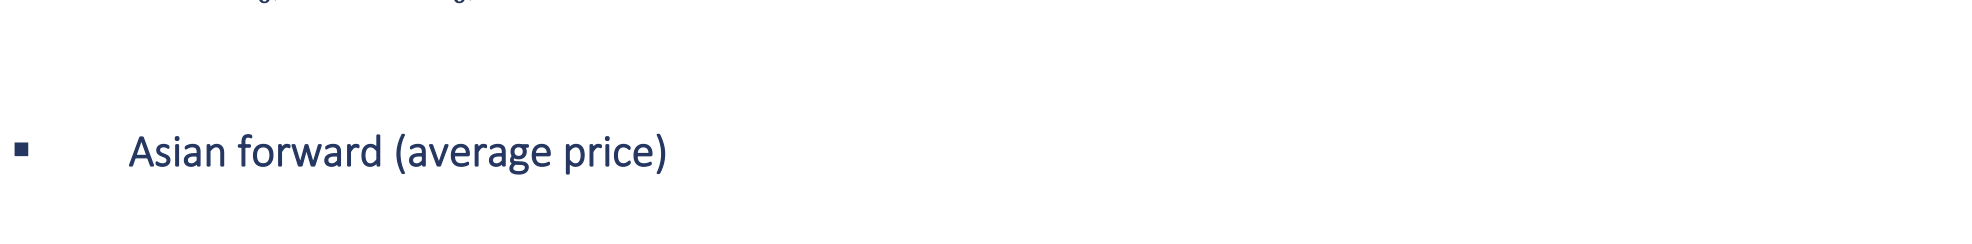
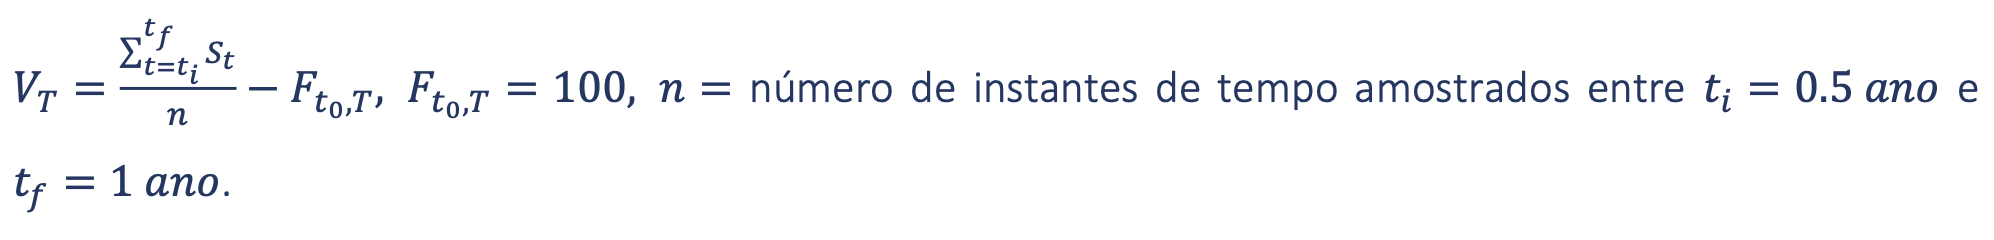

In [135]:
# strike price
F_t = 100

def payoff_asian_forward(prices, forward_price):
    # average of the price path
    avg_price = np.mean(prices)
    # calculate payoff
    payoff = avg_price - forward_price
    return payoff

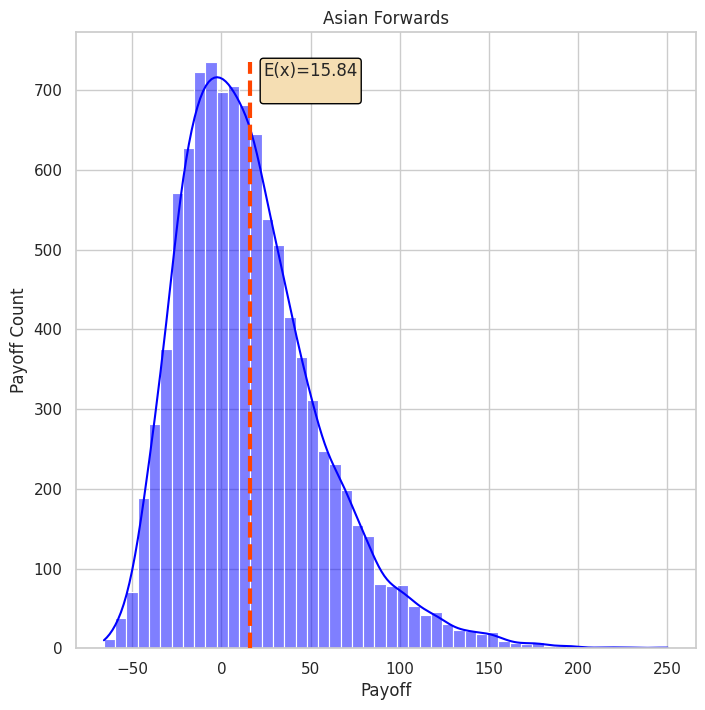

In [136]:
# get n points of the price path, where n = 0.5*T
n = int(0.5 * len(gbm_paths_df)) # 364/2 points

# slice to get last n values
price_values = gbm_paths_df.iloc[-n:]

# calculate the payoff of asian call options
asian_payoffs = price_values.apply(lambda x: payoff_asian_forward(x, F_t))

plot_histogram(asian_payoffs, 'Asian Forwards')

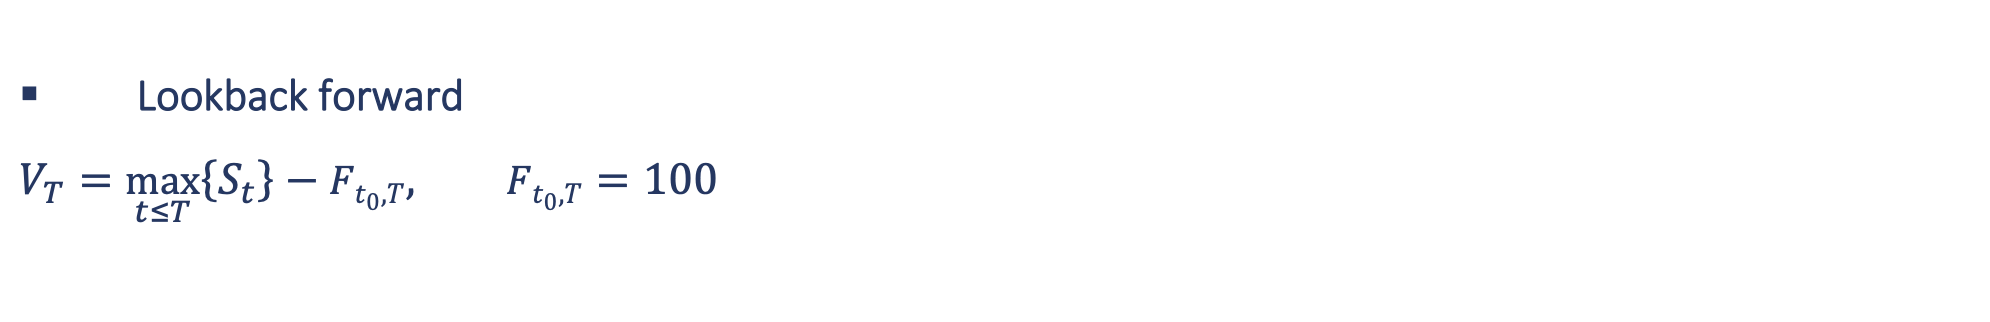

In [137]:
#strike price
F_t = 100

def payoff_lookback_forward(prices, forward_price):
    # get the max of the price path
    max_price = max(prices)
    # calculate payoff between the max of the path and strike
    payoff = max_price - forward_price
    return payoff

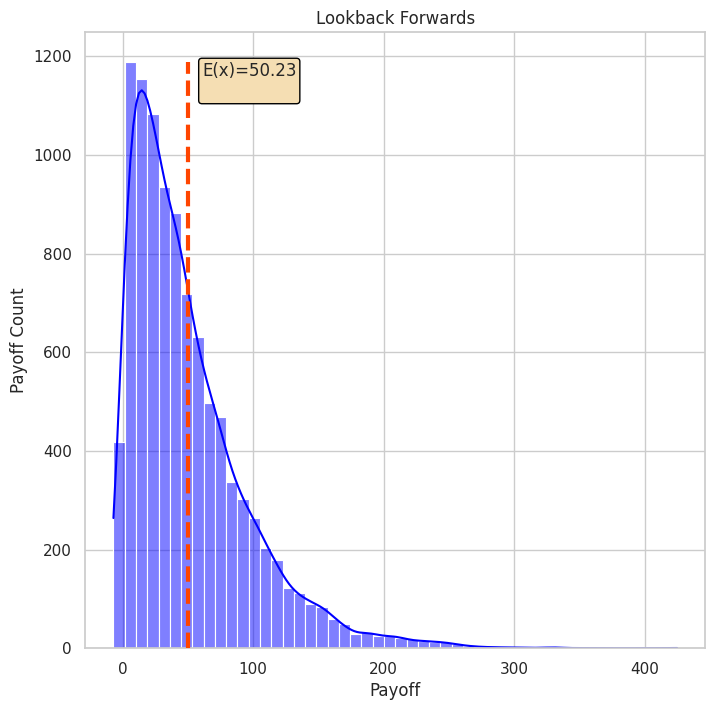

'Como o preço inicial é 100 e o forward price é 100, max(St) >= 100, e o payoff será sempre >= 0'

In [143]:
# consider the whole price path
price_values = gbm_paths_df[1:]

# calculate payoffs
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_forward(x, K))
plot_histogram(payoffs_lookback, 'Lookback Forwards')

'''Como o preço inicial é 100 e o forward price é 100, max(St) >= 100, e o payoff será sempre >= 0'''


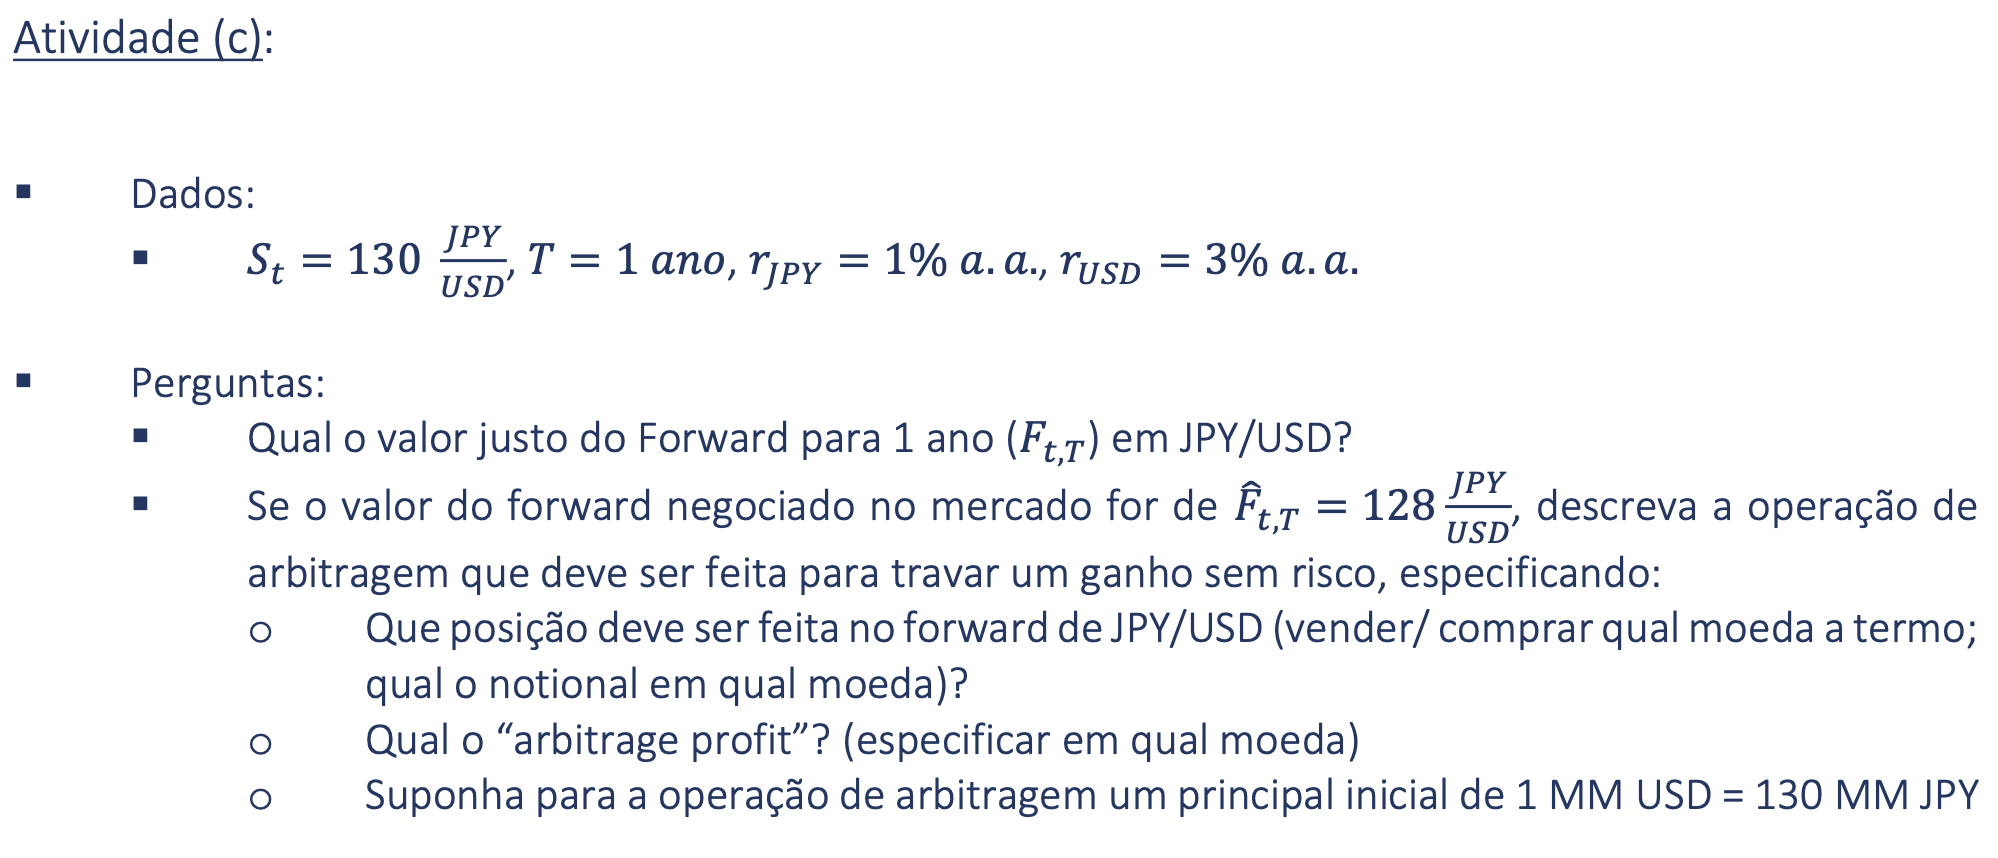

Assumindo que $S_t$ é o valor do câmbio hoje:

In [181]:
def cont_compound(x, r, t):
    return x*np.exp(r*t)

In [353]:
# Definindo a moeda base e a taxa de juros da moeda base
base = 'JPY'
r_base = 0.01

# Definindo a moeda de cotação e a taxa de juros da moeda de cotação
quote = 'USD'
r_quote = 0.03

# Taxa de câmbio entre a moeda base e a moeda de cotação
base_quote = 130  # base/quote
T = 1  # Tempo em anos

# Calculando o preço forward justo com base nas taxas de juros e na taxa de câmbio
Ft = base_quote * np.exp((r_base - r_quote) * T)
print(f'Preço Forward Justo: {Ft :.4f} {base}/{quote}')
print()

# Preço de referência para um contrato futuro
f_hat = 128

# Definindo as taxas de empréstimo para as moedas
borrow_quote = 0
borrow_base = 1_000_000

# Calculando a dívida da moeda base após um período de tempo
debt_base_t = cont_compound(borrow_base, r_base, T)

# Calculando a dívida equivalente em moeda de cotação
debt_quote_t = debt_base_t * 1/f_hat

# Calculando o valor inicial em moeda de cotação
initial_quote = borrow_base * 1/base_quote

# Calculando o valor final em moeda de cotação após investimento a uma taxa de juros
final_quote = cont_compound(initial_quote, r_quote, T)

# Calculando o valor final em moeda base
final_base = final_quote * f_hat

# Calculando o lucro resultante da arbitragem
profit = final_quote - debt_quote_t

# Imprimindo informações sobre a estratégia de arbitragem
print(f'Empresta {borrow_base} {base} a {r_base*100}% por {T} ano(s)')
print(f'Converte para {initial_quote :.2f} {quote} @ {1/base_quote :.4} 1/({base}/{quote}) e investe {quote} a {r_quote*100}%')
print()
print(f'Entra em um contrato futuro para VENDER {debt_quote_t :.2f} {quote} @ {f_hat} {base}/{quote}')
print(f'Notional: {debt_quote_t * f_hat :.2f} {base}')
print()
print(f'Em T={T}: Dívida = {debt_base_t :.2f} {base}')
print(f'Em T={T}: Final Investido = {final_quote :.2f} {quote}')
print(f'Em T={T}: Compensação em {base}:')
print(f'\t Vende {debt_quote_t :.2f} {quote} @ {f_hat} {base}/{quote} = {debt_quote_t*f_hat :.2f} {base} e liquida a dívida')
print()
print(f'-- Arbitrage Profit: {final_quote :.2f} - {debt_quote_t :.2f} = {profit :.2f} {quote}')



Preço Forward Justo: 127.4258 JPY/USD

Empresta 1000000 JPY a 1.0% por 1 ano(s)
Converte para 7692.31 USD @ 0.007692 1/(JPY/USD) e investe USD a 3.0%

Entra em um contrato futuro para VENDER 7891.02 USD @ 128 JPY/USD
Notional: 1010050.17 JPY

Em T=1: Dívida = 1010050.17 JPY
Em T=1: Final Investido = 7926.57 USD
Em T=1: Compensação em JPY:
	 Vende 7891.02 USD @ 128 JPY/USD = 1010050.17 JPY e liquida a dívida

-- Arbitrage Profit: 7926.57 - 7891.02 = 35.56 USD


Ps.: Nesse caso, especifiquei o lucro em dólar, ou seja, o contrato cobriria apenas a dívida contraída em JPY. Poderia-se converter todo o valor recebido do investimento em USD (principal + juros) através de um mesmo instrumento de VENDA de USD @ 128 JPY/USD, com notional de 1014600.96 JPY (7926.57 USD)